# Assignment 4
## Description
In this assignment you must read in a file of metropolitan regions and associated sports teams from [assets/wikipedia_data.html](assets/wikipedia_data.html) and answer some questions about each metropolitan region. Each of these regions may have one or more teams from the "Big 4": NFL (football, in [assets/nfl.csv](assets/nfl.csv)), MLB (baseball, in [assets/mlb.csv](assets/mlb.csv)), NBA (basketball, in [assets/nba.csv](assets/nba.csv) or NHL (hockey, in [assets/nhl.csv](assets/nhl.csv)). Please keep in mind that all questions are from the perspective of the metropolitan region, and that this file is the "source of authority" for the location of a given sports team. Thus teams which are commonly known by a different area (e.g. "Oakland Raiders") need to be mapped into the metropolitan region given (e.g. San Francisco Bay Area). This will require some human data understanding outside of the data you've been given (e.g. you will have to hand-code some names, and might need to google to find out where teams are)!

For each sport I would like you to answer the question: **what is the win/loss ratio's correlation with the population of the city it is in?** Win/Loss ratio refers to the number of wins over the number of wins plus the number of losses. Remember that to calculate the correlation with [`pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html), so you are going to send in two ordered lists of values, the populations from the wikipedia_data.html file and the win/loss ratio for a given sport in the same order. Average the win/loss ratios for those cities which have multiple teams of a single sport. Each sport is worth an equal amount in this assignment (20%\*4=80%) of the grade for this assignment. You should only use data **from year 2018** for your analysis -- this is important!

## Notes

1. Do not include data about the MLS or CFL in any of the work you are doing, we're only interested in the Big 4 in this assignment.
2. I highly suggest that you first tackle the four correlation questions in order, as they are all similar and worth the majority of grades for this assignment. This is by design!
3. It's fair game to talk with peers about high level strategy as well as the relationship between metropolitan areas and sports teams. However, do not post code solving aspects of the assignment (including such as dictionaries mapping areas to teams, or regexes which will clean up names).
4. There may be more teams than the assert statements test, remember to collapse multiple teams in one city into a single value!

## Question 1
For this question, calculate the win/loss ratio's correlation with the population of the city it is in for the **NHL** using **2018** data.

0.012308996455744249

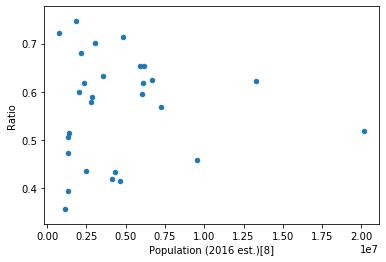

In [8]:
import pandas as pd
import numpy as np
import scipy.stats as stats



def nhl_correlation(): 
    
    nhl_df=pd.read_csv("assets/nhl.csv")
    cities=pd.read_html("assets/wikipedia_data.html")[1]
    cities=cities.iloc[:-1,[0,3,5,6,7,8]]

    nhl_df = nhl_df[nhl_df['year'] == 2018] 

    pop = cities[['Metropolitan area','Population (2016 est.)[8]']] .set_index('Metropolitan area')
    pop['Population (2016 est.)[8]'] = pop['Population (2016 est.)[8]'].apply(float)

    WIN_LOSE = nhl_df[['team','W','L']].set_index('team')

    lookuptable = {
    'Boston Bruins*':'Boston',
    'Buffalo Sabres':'Buffalo',
    'Calgary Flames':'Calgary',
    'Chicago Blackhawks':'Chicago',
    'Columbus Blue Jackets*':'Columbus',
    'Dallas Stars':'Dallas–Fort Worth',
    'Colorado Avalanche*':'Denver',
    'Detroit Red Wings':'Detroit',
    'Edmonton Oilers':'Edmonton',
    'Vegas Golden Knights*':'Las Vegas',
    'Los Angeles Kings*':'Los Angeles',
    'Florida Panthers':'Miami–Fort Lauderdale',
    'Minnesota Wild*':'Minneapolis–Saint Paul',
    'Montreal Canadiens':'Montreal',
    'Nashville Predators*':'Nashville',
    'New York Islanders':'New York City',
    'New Jersey Devils*':'New York City',
    'New York Rangers':'New York City',
    'Ottawa Senators':'Ottawa',
    'Philadelphia Flyers*':'Philadelphia',
    'Arizona Coyotes':'Phoenix',
    'Pittsburgh Penguins*':'Pittsburgh',
    'Carolina Hurricanes':'Raleigh',
    'San Jose Sharks*':'San Francisco Bay Area',
    'St. Louis Blues':'St. Louis',
    'Tampa Bay Lightning*':'Tampa Bay Area',
    'Toronto Maple Leafs*':'Toronto',
    'Vancouver Canucks':'Vancouver',
    'Washington Capitals*':'Washington, D.C.',
    'Winnipeg Jets*':'Winnipeg'
    }
    
    lookuptable['Anaheim Ducks*'] = 'Los Angeles'
    
    cities_teams = pd.DataFrame.from_dict(lookuptable,orient='index',columns = ['Metropolitan area'])
    
    cities_teams_data = cities_teams.merge(WIN_LOSE, left_index = True,right_index = True, how='left')
    cities_teams_data = cities_teams.merge(WIN_LOSE, left_index = True,right_index = True, how='left')

    cities_teams_data['W'] = cities_teams_data['W'].apply(int)
    cities_teams_data['L'] = cities_teams_data['L'].apply(int)


    cities_teams_data = cities_teams_data.groupby('Metropolitan area', as_index=False).agg({"W": "sum","L": "sum"}).set_index('Metropolitan area')

    cities_teams_data['Ratio'] = cities_teams_data['W'] / ( cities_teams_data['W'] + cities_teams_data['L'])

    cities_teams_data = cities_teams_data.merge(pop, left_index = True,right_index = True, how='left')

    cities_teams_data

    population_by_region = cities_teams_data['Population (2016 est.)[8]'] # pass in metropolitan area population from cities
    win_loss_by_region = cities_teams_data['Ratio'] # pass in win/loss ratio from nhl_df in the same order as cities["Metropolitan area"]

    cities_teams_data.plot.scatter(x = 'Population (2016 est.)[8]',y = 'Ratio' )

    assert len(population_by_region) == len(win_loss_by_region), "Q1: Your lists must be the same length"

    assert len(population_by_region) == 28, "Q1: There should be 28 teams being analysed for NHL"

    return stats.pearsonr(win_loss_by_region,population_by_region)[0] 

nhl_correlation()

In [9]:
def matching_code_team_nhl():
    
    nhl_df=pd.read_csv("assets/nhl.csv")
    cities=pd.read_html("assets/wikipedia_data.html")[1]
    cities=cities.iloc[:-1,[0,3,5,6,7,8]]

    from fuzzywuzzy import process

    def fuzzy_match(name,source):
        match = process.extractOne(name, source)

        if match[1] > 50:
            return process.extractOne(name, source)[0]
        else:
            return '-'

    def fuzzy_score(name,source):
        match = process.extractOne(name, source)
        return process.extractOne(name, source)[1]


    def ratio_if_number(w,l):
        try:
            return int(w) / (int(w) + int(l))
        except:
            return np.nan

    def bigger(a,b,c):
        if c == 90:
            return b
        else:
            return a


    cities = cities[['Metropolitan area','Population (2016 est.)[8]','NHL']] 

    pop = cities[['Metropolitan area','Population (2016 est.)[8]']] .set_index('Metropolitan area')
    pop['Population (2016 est.)[8]'] = pop['Population (2016 est.)[8]'].apply(int)

    nhl_df = nhl_df[nhl_df['year'] == 2018] 

    WIN_LOSE = nhl_df[['team','W','L']].set_index('team')


    nhl_df =nhl_df[['team']]

    # nhl_df['ratio'] = nhl_df.apply(lambda x: ratio_if_number(x['W'],x['L']),axis = 1)
    nhl_df['code'] = nhl_df['team'].apply(lambda x : fuzzy_match(x,cities['NHL']))
    nhl_df['score'] = nhl_df['team'].apply(lambda x : fuzzy_score(x,cities['NHL']))

    nhl_df
    nhl_df = nhl_df[nhl_df['code'] != '-']

    nhl_df.set_index('code',inplace = True)
    nhl_df

    cities.set_index('NHL',inplace = True)
    cities

    cons = pd.merge(cities,nhl_df, left_index = True,right_index = True, how = 'left')

    cons['team2'] = cons['Metropolitan area'].apply(lambda x : fuzzy_match(x,nhl_df['team'])) 
    cons['score2'] = cons['Metropolitan area'].apply(lambda x : fuzzy_score(x,nhl_df['team'])) 

    cons = cons.fillna('0')


    cons['teamf'] = cons.apply(lambda x: bigger(x['team'],x['team2'],x['score2']),axis = 1)
    cons = cons[cons['teamf'] != '0']
    cons[['Metropolitan area','teamf']]


    cities_teams = cons[['Metropolitan area','teamf']]
    cities_teams.drop_duplicates(inplace = True)

    cities_teams['Metropolitan area'] = cities_teams.apply(lambda x: x['Metropolitan area'] if x['teamf'] != 'New York Rangers' else 'New York City',axis = 1)
    cities_teams.set_index('teamf', inplace = True)
    cities_teams.sort_values(by = 'Metropolitan area',inplace = True)

    cities_teams.to_csv('time_cidade.csv')

## Question 2
For this question, calculate the win/loss ratio's correlation with the population of the city it is in for the **NBA** using **2018** data.

-0.17657160252844617

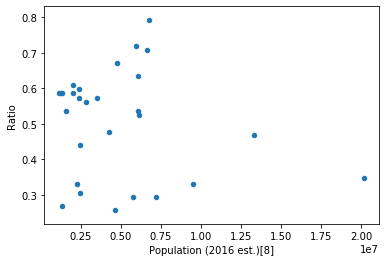

In [10]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import re

nba_df=pd.read_csv("assets/nba.csv")
cities=pd.read_html("assets/wikipedia_data.html")[1]
cities=cities.iloc[:-1,[0,3,5,6,7,8]]

def nba_correlation():
    #
    nba_df=pd.read_csv("assets/nba.csv")
    cities=pd.read_html("assets/wikipedia_data.html")[1]
    cities=cities.iloc[:-1,[0,3,5,6,7,8]]

    nhl_df = nba_df[nba_df['year'] == 2018] 

    pop = cities[['Metropolitan area','Population (2016 est.)[8]']] .set_index('Metropolitan area')
    pop['Population (2016 est.)[8]'] = pop['Population (2016 est.)[8]'].apply(float)

    WIN_LOSE = nhl_df[['team','W','L']].set_index('team')

    lookuptable = {
     'Atlanta Hawks (15)':'Atlanta',
    'Boston Celtics* (2)':'Boston',
    'Charlotte Hornets (10)':'Charlotte',
    'Chicago Bulls (13)':'Chicago',
    'Cleveland Cavaliers* (4)':'Cleveland',
    'Dallas Mavericks (13)':'Dallas–Fort Worth',
    'Denver Nuggets (9)':'Denver',
    'Detroit Pistons (9)':'Detroit',
    'Houston Rockets* (1)':'Houston',
    'Indiana Pacers* (5)':'Indianapolis',
    'Los Angeles Clippers (10)':'Los Angeles',
    'Memphis Grizzlies (14)':'Memphis',
    'Miami Heat* (6)':'Miami–Fort Lauderdale',
    'Milwaukee Bucks* (7)':'Milwaukee',
    'Minnesota Timberwolves* (8)':'Minneapolis–Saint Paul',
    'New Orleans Pelicans* (6)':'New Orleans',
    'New York Knicks (11)':'New York City',
    'Brooklyn Nets (12)':'New York City',
    'Oklahoma City Thunder* (4)':'Oklahoma City',
    'Orlando Magic (14)':'Orlando',
    'Philadelphia 76ers* (3)':'Philadelphia',
    'Phoenix Suns (15)':'Phoenix',
    'Portland Trail Blazers* (3)':'Portland',
    'Sacramento Kings (12)':'Sacramento',
    'Utah Jazz* (5)':'Salt Lake City',
    'San Antonio Spurs* (7)':'San Antonio',
    'Golden State Warriors* (2)':'San Francisco Bay Area',
    'Toronto Raptors* (1)':'Toronto',
    'Washington Wizards* (8)':'Washington, D.C.',
 
    }
    
    #Manual Alterations
    
    lookuptable['Los Angeles Lakers (11)'] = 'Los Angeles'
    
    cities_teams = pd.DataFrame.from_dict(lookuptable,orient='index',columns = ['Metropolitan area'])
    
    cities_teams_data = cities_teams.merge(WIN_LOSE, left_index = True,right_index = True, how='inner')

    cities_teams_data = cities_teams.merge(WIN_LOSE, left_index = True,right_index = True, how='inner')

    cities_teams_data['W'] = cities_teams_data['W'].apply(int)
    cities_teams_data['L'] = cities_teams_data['L'].apply(int)


    cities_teams_data = cities_teams_data.groupby('Metropolitan area', as_index=False).agg({"W": "sum","L": "sum"}).set_index('Metropolitan area')

    cities_teams_data['Ratio'] = cities_teams_data['W'] / ( cities_teams_data['W'] + cities_teams_data['L'])

    cities_teams_data = cities_teams_data.merge(pop, left_index = True,right_index = True, how='left')

    cities_teams_data

    population_by_region = cities_teams_data['Population (2016 est.)[8]'] # pass in metropolitan area population from cities
    win_loss_by_region = cities_teams_data['Ratio'] # pass in win/loss ratio from nhl_df in the same order as cities["Metropolitan area"]

    cities_teams_data.plot.scatter(x = 'Population (2016 est.)[8]',y = 'Ratio' )

    assert len(population_by_region) == len(win_loss_by_region), "Q1: Your lists must be the same length"

    assert len(population_by_region) == 28, "Q1: There should be 28 teams being analysed for NHL"

    return stats.pearsonr(win_loss_by_region,population_by_region)[0]

nba_correlation()

In [11]:
def matching_code_team_nba():
    
    nhl_df=pd.read_csv("assets/nba.csv")
    cities=pd.read_html("assets/wikipedia_data.html")[1]
    cities=cities.iloc[:-1,[0,3,5,6,7,8]]

    from fuzzywuzzy import process

    def fuzzy_match(name,source):
        match = process.extractOne(name, source)

        if match[1] > 50:
            return process.extractOne(name, source)[0]
        else:
            return '-'

    def fuzzy_score(name,source):
        match = process.extractOne(name, source)
        return process.extractOne(name, source)[1]


    def ratio_if_number(w,l):
        try:
            return int(w) / (int(w) + int(l))
        except:
            return np.nan

    def bigger(a,b,c):
        if a == '0':
            return b
        else:
            return a


    cities = cities[['Metropolitan area','Population (2016 est.)[8]','NBA']] 

    pop = cities[['Metropolitan area','Population (2016 est.)[8]']] .set_index('Metropolitan area')
    pop['Population (2016 est.)[8]'] = pop['Population (2016 est.)[8]'].apply(int)

    nhl_df = nhl_df[nhl_df['year'] == 2018] 

    WIN_LOSE = nhl_df[['team','W','L']].set_index('team')


    nhl_df =nhl_df[['team']]

    # nhl_df['ratio'] = nhl_df.apply(lambda x: ratio_if_number(x['W'],x['L']),axis = 1)
    nhl_df['code'] = nhl_df['team'].apply(lambda x : fuzzy_match(x,cities['NBA']))
    nhl_df['score'] = nhl_df['team'].apply(lambda x : fuzzy_score(x,cities['NBA']))

    nhl_df = nhl_df[nhl_df['code'] != '-']

    nhl_df.set_index('code',inplace = True)
    nhl_df

    cities.set_index('NBA',inplace = True)
    cities

    cons = pd.merge(cities,nhl_df, left_index = True,right_index = True, how = 'left')

    cons['team2'] = cons['Metropolitan area'].apply(lambda x : fuzzy_match(x,nhl_df['team'])) 
    cons['score2'] = cons['Metropolitan area'].apply(lambda x : fuzzy_score(x,nhl_df['team'])) 

    cons = cons.fillna('0')

    cons['teamf'] = cons.apply(lambda x: bigger(x['team'],x['team2'],x['score2']),axis = 1)

    cons = cons[cons['teamf'] != '0']
    cities_teams = cons[['Metropolitan area','teamf']]
    cities_teams.drop_duplicates(inplace = True)

    cities_teams['Metropolitan area'] = cities_teams.apply(lambda x: x['Metropolitan area'] if x['teamf'] != 'New York Rangers' else 'New York City',axis = 1)
    cities_teams.set_index('teamf', inplace = True)
    cities_teams.sort_values(by = 'Metropolitan area',inplace = True)

    cities_teams.to_csv('time_cidade_NBA.csv')
    cities_teams


## Question 3
For this question, calculate the win/loss ratio's correlation with the population of the city it is in for the **MLB** using **2018** data.

0.1505230448710485

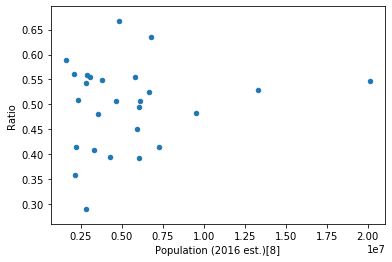

In [12]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import re

mlb_df=pd.read_csv("assets/mlb.csv")
cities=pd.read_html("assets/wikipedia_data.html")[1]
cities=cities.iloc[:-1,[0,3,5,6,7,8]]

def mlb_correlation(): 
    
    mlb_df=pd.read_csv("assets/mlb.csv")
    cities=pd.read_html("assets/wikipedia_data.html")[1]
    cities=cities.iloc[:-1,[0,3,5,6,7,8]]

    nhl_df = mlb_df[mlb_df['year'] == 2018] 

    pop = cities[['Metropolitan area','Population (2016 est.)[8]']] .set_index('Metropolitan area')
    pop['Population (2016 est.)[8]'] = pop['Population (2016 est.)[8]'].apply(float)

    WIN_LOSE = nhl_df[['team','W','L']].set_index('team')

    lookuptable = {

"Boston Red Sox":"Boston",
"New York Yankees":"New York City",
"Baltimore Orioles":"Baltimore",
"Cleveland Indians":"Cleveland",
"Detroit Tigers":"Detroit",
"Chicago White Sox":"Chicago",
"Kansas City Royals":"Kansas City",
"Los Angeles Angels":"Los Angeles",
"Washington Nationals":"Washington, D.C.",
"Philadelphia Phillies":"Philadelphia",
"New York Mets":"New York City",
"Milwaukee Brewers":"Milwaukee",
"Chicago Cubs":"Chicago",
"St. Louis Cardinals":"St. Louis",
"Cincinnati Reds":"Cincinnati",
"Los Angeles Dodgers":"Los Angeles",
"San Francisco Giants":"San Francisco Bay Area",
"Houston Astros":"Houston",
"Toronto Blue Jays":"Toronto",
"Atlanta Braves":"Atlanta",
"Arizona Diamondbacks":"Phoenix",
"Oakland Athletics":"San Francisco Bay Area",
"Seattle Mariners":"Seattle",
"Miami Marlins":"Miami–Fort Lauderdale",
"San Diego Padres":"San Diego",
"Pittsburgh Pirates":"Pittsburgh",
"Texas Rangers":"Dallas–Fort Worth",
"Tampa Bay Rays":"Tampa Bay Area",
"Colorado Rockies":"Denver",
"Minnesota Twins":"Minneapolis–Saint Paul",

    }
    
    
    cities_teams = pd.DataFrame.from_dict(lookuptable,orient='index',columns = ['Metropolitan area'])
    
    cities_teams_data = cities_teams.merge(WIN_LOSE, left_index = True,right_index = True, how='left')

    cities_teams_data = cities_teams.merge(WIN_LOSE, left_index = True,right_index = True, how='left')

    cities_teams_data['W'] = cities_teams_data['W'].apply(int)
    cities_teams_data['L'] = cities_teams_data['L'].apply(int)


    cities_teams_data = cities_teams_data.groupby('Metropolitan area', as_index=False).agg({"W": "sum","L": "sum"}).set_index('Metropolitan area')

    cities_teams_data['Ratio'] = cities_teams_data['W'] / ( cities_teams_data['W'] + cities_teams_data['L'])

    cities_teams_data = cities_teams_data.merge(pop, left_index = True,right_index = True, how='left')

    cities_teams_data

    population_by_region = cities_teams_data['Population (2016 est.)[8]'] # pass in metropolitan area population from cities
    win_loss_by_region = cities_teams_data['Ratio'] # pass in win/loss ratio from nhl_df in the same order as cities["Metropolitan area"]

    cities_teams_data.plot.scatter(x = 'Population (2016 est.)[8]',y = 'Ratio' )

    assert len(population_by_region) == len(win_loss_by_region), "Q1: Your lists must be the same length"

    assert len(population_by_region) == 26, "Q1: There should be 26 teams being analysed for MLB"

    return stats.pearsonr(win_loss_by_region,population_by_region)[0]
mlb_correlation()

In [13]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import re

def matching_code_team_MLB():
    
    mbl_df=pd.read_csv("assets/mlb.csv")
    cities=pd.read_html("assets/wikipedia_data.html")[1]
    cities=cities.iloc[:-1,[0,3,5,6,7,8]]
    
    from fuzzywuzzy import process

    def fuzzy_match(name,source):
        match = process.extractOne(name, source)

        if match[1] > 50:
            return process.extractOne(name, source)[0]
        else:
            return '-'

    def fuzzy_score(name,source):
        match = process.extractOne(name, source)
        return process.extractOne(name, source)[1]


    def ratio_if_number(w,l):
        try:
            return int(w) / (int(w) + int(l))
        except:
            return np.nan

    cities = cities[['Metropolitan area','Population (2016 est.)[8]','MLB']] 

    pop = cities[['Metropolitan area','Population (2016 est.)[8]']] .set_index('Metropolitan area')
    pop['Population (2016 est.)[8]'] = pop['Population (2016 est.)[8]'].apply(int)

    mbl_df = mbl_df[mbl_df['year'] == 2018] 

    WIN_LOSE = mbl_df[['team','W','L']].set_index('team')
    WIN_LOSE['W'] = WIN_LOSE['W'].apply(int)
    WIN_LOSE['L'] = WIN_LOSE['L'].apply(int)

    
    teams = mbl_df[['team']]

    teams['f_match_surname'] = teams['team'].apply(lambda x : fuzzy_match(x,cities['MLB']))
    teams['f_match_citie'] = teams['team'].apply(lambda x : fuzzy_match(x,cities['Metropolitan area']))
    teams['f_score_surname'] = teams['team'].apply(lambda x : fuzzy_score(x,cities['MLB']))
    teams['f_score_citie'] = teams['team'].apply(lambda x : fuzzy_score(x,cities['Metropolitan area']))
    
    teams['f_matchmax'] = teams.apply(lambda x :x['f_match_citie'] if x ['f_score_citie'] > x['f_score_surname'] else x['f_match_surname'], axis=1)
    
    teams['type'] = teams.apply(lambda x :'city' if x ['f_score_citie'] > x['f_score_surname'] else 'surname', axis=1)
    
    
    
    lookup_city = teams[teams['type'] == 'city' ]
    lookup_city = lookup_city[['team','f_matchmax']]
    lookup_city.set_index('team', inplace = True)
    lookup_city.columns = ['Metropolitan area']
    
    lookup_surname = teams[teams['type'] == 'surname']
    lookup_surname.set_index('f_matchmax', inplace = True)
    lookup_surname = lookup_surname.merge(cities.set_index('MLB'), left_index = True, right_index = True)
    lookup_surname = lookup_surname[['team','Metropolitan area']]                    
    lookup_surname.set_index('team', inplace = True)
    
    
    lookup = lookup_city.append(lookup_surname)
    lookup.loc['San Francisco Giants'] = 'San Francisco Bay Area'
    
    lookup.to_csv('lookup_mlb.csv')
    
    return lookup.shape
matching_code_team_MLB()

(30, 1)

In [14]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


## Question 4
For this question, calculate the win/loss ratio's correlation with the population of the city it is in for the **NFL** using **2018** data.

0.004922112149349393

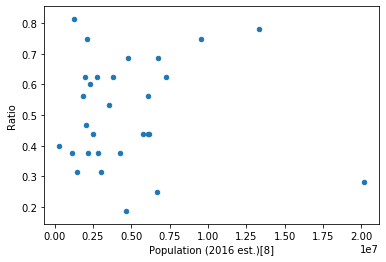

In [15]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import re



def nfl_correlation(): 

    nfl_df=pd.read_csv("assets/nfl.csv")
    cities=pd.read_html("assets/wikipedia_data.html")[1]
    cities=cities.iloc[:-1,[0,3,5,6,7,8]]

    nfl_df = nfl_df[nfl_df['year'] == 2018] 

    pop = cities[['Metropolitan area','Population (2016 est.)[8]']] .set_index('Metropolitan area')
    pop['Population (2016 est.)[8]'] = pop['Population (2016 est.)[8]'].apply(float)

    WIN_LOSE = nfl_df[['team','W','L']].set_index('team')

    lookuptable = {
        
    "New England Patriots*":"Boston",
    "Buffalo Bills":"Buffalo",
    "New York Jets":"New York City",
    "Baltimore Ravens*":"Baltimore",
    "Cleveland Browns":"Cleveland",

    "Houston Texans*":"Houston",
     "Los Angeles Chargers+":"Los Angeles",
    "Oakland Raiders":"San Francisco Bay Area",
    "New York Giants":"New York City",
    "Chicago Bears*":"Chicago",

    "Los Angeles Rams*":"Los Angeles",
    "Cincinnati Bengals":"Cincinnati",
    "Denver Broncos":"Denver",
    "Tampa Bay Buccaneers":"Tampa Bay Area",
    "Arizona Cardinals":"Phoenix",
    "Kansas City Chiefs*":"Kansas City",
    "Indianapolis Colts+":"Indianapolis",
    "Dallas Cowboys*":"Dallas–Fort Worth",
    "Miami Dolphins":"Miami–Fort Lauderdale",
    "Philadelphia Eagles+":"Philadelphia",
    "Atlanta Falcons":"Atlanta",
    "Jacksonville Jaguars":"Jacksonville",
    "Detroit Lions":"Detroit",

    "San Francisco 49ers":"San Francisco Bay Area",

    "Green Bay Packers":"Green Bay",
    "Carolina Panthers":"Charlotte",
    "Washington Redskins":"Washington, D.C.",
    "New Orleans Saints*":"New Orleans",
    "Seattle Seahawks+":"Seattle",
    "Pittsburgh Steelers":"Pittsburgh",
    "Tennessee Titans":"Nashville",
    "Minnesota Vikings":"Minneapolis–Saint Paul"
    }
    
    
    cities_teams = pd.DataFrame.from_dict(lookuptable,orient='index',columns = ['Metropolitan area'])
    
    cities_teams_data = cities_teams.merge(WIN_LOSE, left_index = True,right_index = True, how='inner')

    cities_teams_data = cities_teams.merge(WIN_LOSE, left_index = True,right_index = True, how='inner')
    
    cities_teams_data['W'] = cities_teams_data['W'].apply(int)
    cities_teams_data['L'] = cities_teams_data['L'].apply(int)


    cities_teams_data = cities_teams_data.groupby('Metropolitan area', as_index=False).agg({"W": "sum","L": "sum"}).set_index('Metropolitan area')

    cities_teams_data['Ratio'] = cities_teams_data['W'] / ( cities_teams_data['W'] + cities_teams_data['L'])

    cities_teams_data = cities_teams_data.merge(pop, left_index = True,right_index = True, how='inner')

    cities_teams_data

    population_by_region = cities_teams_data['Population (2016 est.)[8]'] # pass in metropolitan area population from cities
    win_loss_by_region = cities_teams_data['Ratio'] # pass in win/loss ratio from nhl_df in the same order as cities["Metropolitan area"]

    cities_teams_data.plot.scatter(x = 'Population (2016 est.)[8]',y = 'Ratio' )

    assert len(population_by_region) == len(win_loss_by_region), "Q4: Your lists must be the same length"
    assert len(population_by_region) == 29, "Q4: There should be 29 teams being analysed for NFL"

    return stats.pearsonr(win_loss_by_region,population_by_region)[0]
nfl_correlation()

In [16]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import re

def matching_code_team_nfl():
    
    mbl_df=pd.read_csv("assets/nfl.csv")
    cities=pd.read_html("assets/wikipedia_data.html")[1]
    cities=cities.iloc[:-1,[0,3,5,6,7,8]]
    
    from fuzzywuzzy import process

    def fuzzy_match(name,source):
        match = process.extractOne(name, source)

        if match[1] > 50:
            return process.extractOne(name, source)[0]
        else:
            return '-'

    def fuzzy_score(name,source):
        match = process.extractOne(name, source)
        return process.extractOne(name, source)[1]


    def ratio_if_number(w,l):
        try:
            return int(w) / (int(w) + int(l))
        except:
            return np.nan

    cities = cities[['Metropolitan area','Population (2016 est.)[8]','NFL']] 

    pop = cities[['Metropolitan area','Population (2016 est.)[8]']] .set_index('Metropolitan area')
    pop['Population (2016 est.)[8]'] = pop['Population (2016 est.)[8]'].apply(int)

    mbl_df = mbl_df[mbl_df['year'] == 2018] 
    
    teams = mbl_df[['team']]

    teams['f_match_surname'] = teams['team'].apply(lambda x : fuzzy_match(x,cities['NFL']))
    teams['f_match_citie'] = teams['team'].apply(lambda x : fuzzy_match(x,cities['Metropolitan area']))
    teams['f_score_surname'] = teams['team'].apply(lambda x : fuzzy_score(x,cities['NFL']))
    teams['f_score_citie'] = teams['team'].apply(lambda x : fuzzy_score(x,cities['Metropolitan area']))
    
    teams['f_matchmax'] = teams.apply(lambda x :x['f_match_citie'] if x ['f_score_citie'] > x['f_score_surname'] else x['f_match_surname'], axis=1)
    
    teams['type'] = teams.apply(lambda x :'city' if x ['f_score_citie'] > x['f_score_surname'] else 'surname', axis=1)
    
    
    
    lookup_city = teams[teams['type'] == 'city' ]
    lookup_city = lookup_city[['team','f_matchmax']]
    lookup_city.set_index('team', inplace = True)
    lookup_city.columns = ['Metropolitan area']
    
    lookup_surname = teams[teams['type'] == 'surname']
    lookup_surname.set_index('f_matchmax', inplace = True)
    lookup_surname = lookup_surname.merge(cities.set_index('NFL'), left_index = True, right_index = True)
    lookup_surname = lookup_surname[['team','Metropolitan area']]                    
    lookup_surname.set_index('team', inplace = True)
    
    
    lookup = lookup_city.append(lookup_surname)
    lookup.loc['San Francisco 49ers'] = 'San Francisco Bay Area'
    lookup.loc['Oakland Raiders'] = 'San Francisco Bay Area'
    lookup.loc['New England Patriots*'] = 'Boston'
    lookup.to_csv('lookup_nfl.csv')
    
    return lookup
matching_code_team_nfl()

,Metropolitan area
team,
New England Patriots*,Boston
Buffalo Bills,Buffalo
New York Jets,New York City
Baltimore Ravens*,Baltimore
Cleveland Browns,Cleveland
AFC South,-
Houston Texans*,Houston
Los Angeles Chargers+,Los Angeles
Oakland Raiders,San Francisco Bay Area


In [17]:
pop = cities.sort_values(by = 'Population (2016 est.)[8]')

pop['Population (2016 est.)[8]'] = pop['Population (2016 est.)[8]'].apply(int)

pop.sort_values(by = 'Population (2016 est.)[8]')

,Metropolitan area,Population (2016 est.)[8],NFL,MLB,NBA,NHL
50,Regina,236481,—,—,—,—
48,Green Bay,318236,Packers,—,—,—
49,Hamilton,747545,—,—,—,[note 71]
39,Winnipeg,778489,—,—,—,Jets[note 61]
29,Buffalo,1132804,Bills[note 56],[note 57],[note 58],Sabres
38,Salt Lake City,1186187,—,—,Jazz,—
28,New Orleans,1268883,Saints,—,Pelicans[note 55],—
47,Raleigh,1302946,—,—,—,Hurricanes
37,Edmonton,1321426,—,—,—,Oilers
36,Ottawa,1323783,—,—,—,Senators


## Question 5
In this question I would like you to explore the hypothesis that **given that an area has two sports teams in different sports, those teams will perform the same within their respective sports**. How I would like to see this explored is with a series of paired t-tests (so use [`ttest_rel`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)) between all pairs of sports. Are there any sports where we can reject the null hypothesis? Again, average values where a sport has multiple teams in one region. Remember, you will only be including, for each sport, cities which have teams engaged in that sport, drop others as appropriate. This question is worth 20% of the grade for this assignment.

In [285]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import re





def sports_team_performance():
    
    mlb_df=pd.read_csv("assets/mlb.csv")
    nhl_df=pd.read_csv("assets/nhl.csv")
    nba_df=pd.read_csv("assets/nba.csv")
    nfl_df=pd.read_csv("assets/nfl.csv")
 
    cities=pd.read_html("assets/wikipedia_data.html")[1]
    cities=cities.iloc[:-1,[0,3,5,6,7,8]]
    
    mlb_df = mlb_df[mlb_df['year'] == 2018] 
    nhl_df = nhl_df[nhl_df['year'] == 2018] 
    nba_df = nba_df[nba_df['year'] == 2018] 
    nfl_df = nfl_df[nfl_df['year'] == 2018] 

    # YOUR CODE HERE
    #raise NotImplementedError()
    
    # Note: p_values is a full dataframe, so df.loc["NFL","NBA"] should be the same as df.loc["NBA","NFL"] and
    # df.loc["NFL","NFL"] should return np.nan
    
    nhl_dict = {
    'Boston Bruins*':'Boston',
    'Buffalo Sabres':'Buffalo',
    'Calgary Flames':'Calgary',
    'Chicago Blackhawks':'Chicago',
    'Columbus Blue Jackets*':'Columbus',
    'Dallas Stars':'Dallas–Fort Worth',
    'Colorado Avalanche*':'Denver',
    'Detroit Red Wings':'Detroit',
    'Edmonton Oilers':'Edmonton',
    'Vegas Golden Knights*':'Las Vegas',
    'Los Angeles Kings*':'Los Angeles',
    'Florida Panthers':'Miami–Fort Lauderdale',
    'Minnesota Wild*':'Minneapolis–Saint Paul',
    'Montreal Canadiens':'Montreal',
    'Nashville Predators*':'Nashville',
    'New York Islanders':'New York City',
    'New Jersey Devils*':'New York City',
    'New York Rangers':'New York City',
    'Ottawa Senators':'Ottawa',
    'Philadelphia Flyers*':'Philadelphia',
    'Arizona Coyotes':'Phoenix',
    'Pittsburgh Penguins*':'Pittsburgh',
    'Carolina Hurricanes':'Raleigh',
    'San Jose Sharks*':'San Francisco Bay Area',
    'St. Louis Blues':'St. Louis',
    'Tampa Bay Lightning*':'Tampa Bay Area',
    'Toronto Maple Leafs*':'Toronto',
    'Vancouver Canucks':'Vancouver',
    'Washington Capitals*':'Washington, D.C.',
    'Winnipeg Jets*':'Winnipeg',
    'Anaheim Ducks*':'Los Angeles'
    }
    
    nhl_teams = pd.DataFrame.from_dict(nhl_dict,orient='index',columns = ['Metropolitan area'])
    nhl_teams.reset_index(inplace = True)
    nhl_teams.columns = ['NHL2','Metropolitan area']
    
    nba_dict = {
     'Atlanta Hawks (15)':'Atlanta',
    'Boston Celtics* (2)':'Boston',
    'Charlotte Hornets (10)':'Charlotte',
    'Chicago Bulls (13)':'Chicago',
    'Cleveland Cavaliers* (4)':'Cleveland',
    'Dallas Mavericks (13)':'Dallas–Fort Worth',
    'Denver Nuggets (9)':'Denver',
    'Detroit Pistons (9)':'Detroit',
    'Houston Rockets* (1)':'Houston',
    'Indiana Pacers* (5)':'Indianapolis',
    'Los Angeles Clippers (10)':'Los Angeles',
    'Memphis Grizzlies (14)':'Memphis',
    'Miami Heat* (6)':'Miami–Fort Lauderdale',
    'Milwaukee Bucks* (7)':'Milwaukee',
    'Minnesota Timberwolves* (8)':'Minneapolis–Saint Paul',
    'New Orleans Pelicans* (6)':'New Orleans',
    'New York Knicks (11)':'New York City',
    'Brooklyn Nets (12)':'New York City',
    'Oklahoma City Thunder* (4)':'Oklahoma City',
    'Orlando Magic (14)':'Orlando',
    'Philadelphia 76ers* (3)':'Philadelphia',
    'Phoenix Suns (15)':'Phoenix',
    'Portland Trail Blazers* (3)':'Portland',
    'Sacramento Kings (12)':'Sacramento',
    'Utah Jazz* (5)':'Salt Lake City',
    'San Antonio Spurs* (7)':'San Antonio',
    'Golden State Warriors* (2)':'San Francisco Bay Area',
    'Toronto Raptors* (1)':'Toronto',
    'Washington Wizards* (8)':'Washington, D.C.',
    'Los Angeles Lakers (11)':'Los Angeles'
    }
    
    nba_teams = pd.DataFrame.from_dict(nba_dict,orient='index',columns = ['Metropolitan area'])
    nba_teams.reset_index(inplace = True)
    nba_teams.columns = ['NBA2','Metropolitan area']
    
    mlb_dict = {
    "Boston Red Sox":"Boston",
    "New York Yankees":"New York City",
    "Baltimore Orioles":"Baltimore",
    "Cleveland Indians":"Cleveland",
    "Detroit Tigers":"Detroit",
    "Chicago White Sox":"Chicago",
    "Kansas City Royals":"Kansas City",
    "Los Angeles Angels":"Los Angeles",
    "Washington Nationals":"Washington, D.C.",
    "Philadelphia Phillies":"Philadelphia",
    "New York Mets":"New York City",
    "Milwaukee Brewers":"Milwaukee",
    "Chicago Cubs":"Chicago",
    "St. Louis Cardinals":"St. Louis",
    "Cincinnati Reds":"Cincinnati",
    "Los Angeles Dodgers":"Los Angeles",
    "San Francisco Giants":"San Francisco Bay Area",
    "Houston Astros":"Houston",
    "Toronto Blue Jays":"Toronto",
    "Atlanta Braves":"Atlanta",
    "Arizona Diamondbacks":"Phoenix",
    "Oakland Athletics":"San Francisco Bay Area",
    "Seattle Mariners":"Seattle",
    "Miami Marlins":"Miami–Fort Lauderdale",
    "San Diego Padres":"San Diego",
    "Pittsburgh Pirates":"Pittsburgh",
    "Texas Rangers":"Dallas–Fort Worth",
    "Tampa Bay Rays":"Tampa Bay Area",
    "Colorado Rockies":"Denver",
    "Minnesota Twins":"Minneapolis–Saint Paul",
    }
    
    mlb_teams = pd.DataFrame.from_dict(mlb_dict,orient='index',columns = ['Metropolitan area'])
    mlb_teams.reset_index(inplace = True)
    mlb_teams.columns = ['MLB2','Metropolitan area']
    
    nfl_dict ={
    "New England Patriots*":"Boston",
    "Buffalo Bills":"Buffalo",
    "New York Jets":"New York City",
    "Baltimore Ravens*":"Baltimore",
    "Cleveland Browns":"Cleveland",
    "Houston Texans*":"Houston",
     "Los Angeles Chargers+":"Los Angeles",
    "Oakland Raiders":"San Francisco Bay Area",
    "New York Giants":"New York City",
    "Chicago Bears*":"Chicago",
    "Los Angeles Rams*":"Los Angeles",
    "Cincinnati Bengals":"Cincinnati",
    "Denver Broncos":"Denver",
    "Tampa Bay Buccaneers":"Tampa Bay Area",
    "Arizona Cardinals":"Phoenix",
    "Kansas City Chiefs*":"Kansas City",
    "Indianapolis Colts+":"Indianapolis",
    "Dallas Cowboys*":"Dallas–Fort Worth",
    "Miami Dolphins":"Miami–Fort Lauderdale",
    "Philadelphia Eagles+":"Philadelphia",
    "Atlanta Falcons":"Atlanta",
    "Jacksonville Jaguars":"Jacksonville",
    "Detroit Lions":"Detroit",
    "San Francisco 49ers":"San Francisco Bay Area",
    "Green Bay Packers":"Green Bay",
    "Carolina Panthers":"Charlotte",
    "Washington Redskins":"Washington, D.C.",
    "New Orleans Saints*":"New Orleans",
    "Seattle Seahawks+":"Seattle",
    "Pittsburgh Steelers":"Pittsburgh",
    "Tennessee Titans":"Nashville",
    "Minnesota Vikings":"Minneapolis–Saint Paul"
    }
    
    WIN_LOSE = nfl_df[['team','W','L']].set_index('team')
    nfl_teams = pd.DataFrame.from_dict(nfl_dict,orient='index',columns = ['Metropolitan area'])    
    nfl_teams = nfl_teams.merge(WIN_LOSE, left_index = True,right_index = True, how='left')
    nfl_teams['W'] = nfl_teams['W'].apply(int)
    nfl_teams['L'] = nfl_teams['L'].apply(int)
    nfl_cities = nfl_teams.groupby('Metropolitan area', as_index=False).agg({"W": "sum","L": "sum"}).set_index('Metropolitan area')
    nfl_cities['NFL'] = nfl_cities['W'] / (nfl_cities['W'] + nfl_cities['L'])
    
    
    WIN_LOSE = nba_df[['team','W','L']].set_index('team')
    nba_teams = pd.DataFrame.from_dict(nba_dict,orient='index',columns = ['Metropolitan area'])    
    nba_teams = nba_teams.merge(WIN_LOSE, left_index = True,right_index = True, how='left')
    nba_teams['W'] = nba_teams['W'].apply(int)
    nba_teams['L'] = nba_teams['L'].apply(int)
    nba_cities = nba_teams.groupby('Metropolitan area', as_index=False).agg({"W": "sum","L": "sum"}).set_index('Metropolitan area')
    nba_cities['NBA'] = nba_cities['W'].apply(int) / (nba_cities['W'].apply(int) + nba_cities['L'].apply(int))
    
    WIN_LOSE = mlb_df[['team','W','L']].set_index('team')
    mlb_teams = pd.DataFrame.from_dict(mlb_dict,orient='index',columns = ['Metropolitan area'])    
    mlb_teams = mlb_teams.merge(WIN_LOSE, left_index = True,right_index = True, how='left')
    mlb_teams['W'] = mlb_teams['W'].apply(int)
    mlb_teams['L'] = mlb_teams['L'].apply(int)
    mlb_cities = mlb_teams.groupby('Metropolitan area', as_index=False).agg({"W": "sum","L": "sum"}).set_index('Metropolitan area')
    mlb_cities['MLB'] = mlb_cities['W'].apply(int) / (mlb_cities['W'].apply(int) + mlb_cities['L'].apply(int))
    
    WIN_LOSE = nhl_df[['team','W','L']].set_index('team')
    nhl_teams = pd.DataFrame.from_dict(nhl_dict,orient='index',columns = ['Metropolitan area'])    
    nhl_teams = nhl_teams.merge(WIN_LOSE, left_index = True,right_index = True, how='left')
    nhl_teams['W'] = nhl_teams['W'].apply(int)
    nhl_teams['L'] = nhl_teams['L'].apply(int)
    nhl_cities = nhl_teams.groupby('Metropolitan area', as_index=False).agg({"W": "sum","L": "sum"}).set_index('Metropolitan area')
    nhl_cities['NHL'] = nhl_cities['W'].apply(int) / (nhl_cities['W'].apply(int) + nhl_cities['L'].apply(int))
    
    cities = cities.iloc[:,[0,1]].set_index('Metropolitan area')
    cities = cities.merge(pd.DataFrame(nba_cities.iloc[:,-1]), how = 'left', right_index = True, left_index = True)
    cities = cities.merge(pd.DataFrame(nhl_cities.iloc[:,-1]), how = 'left', right_index = True, left_index = True)
    cities = cities.merge(pd.DataFrame(mlb_cities.iloc[:,-1]), how = 'left', right_index = True, left_index = True)
    cities = cities.merge(pd.DataFrame(nfl_cities.iloc[:,-1]), how = 'left', right_index = True, left_index = True)
    
    sports = ['NFL', 'NBA', 'NHL', 'MLB']
    
    
    p_values = pd.DataFrame({k:np.nan for k in sports}, index=sports)

    for a in p_values.index:
            for b in p_values.columns:
                temp = cities[[a,b]].dropna()
                p_values.loc[a,b] = stats.ttest_rel(temp.iloc[:,0],temp.iloc[:,1])[1]
                
    assert abs(p_values.loc["NBA", "NHL"] - 0.02) <= 1e-2, "The NBA-NHL p-value should be around 0.02"
    assert abs(p_values.loc["MLB", "NFL"] - 0.80) <= 1e-2, "The MLB-NFL p-value should be around 0.80" 
    return  p_values
sports_team_performance()

'NFL'

In [279]:
def result():
    s = 'ACAABAACAAABACDBADDDFSDDDFFSSSASDAFAAACBAAAFASD'

    result = []
    # compete the pattern below
    pattern ="(?<=AAA)\w" 
    
    for item in re.finditer(pattern, s,re.VERBOSE):
        result.append(item.group())
      
    return result
result()

['B', 'C', 'F']